### Abstract: Image Classification of Traffic Signals using CNNs with TensorFlow

Traffic signal recognition is a crucial component of intelligent transportation systems, enhancing road safety and efficiency. In this project, we present a Convolutional Neural Network (CNN) approach using the TensorFlow framework to classify images of traffic signals. The dataset consists of a diverse collection of annotated traffic signal images, encompassing various weather conditions, illumination levels, and traffic scenarios.

The CNN architecture is designed to automatically learn hierarchical features from raw pixel values, enabling the model to discern intricate patterns and variations in traffic signal images. We employ convolutional layers for feature extraction, pooling layers for spatial downsampling, and fully connected layers for classification. The softmax activation function in the output layer allows the model to output probability distributions across multiple traffic signal classes.

Training and validation are performed on preprocessed datasets, incorporating techniques such as normalization and data augmentation to enhance model generalization. The model's performance is evaluated using metrics such as accuracy, precision, recall, and the confusion matrix.

Our experimental results demonstrate the effectiveness of the proposed CNN architecture in accurately classifying traffic signals under diverse conditions. The trained model exhibits robust performance, providing a foundation for real-world applications in traffic management and autonomous driving systems.

This project contributes to the growing field of computer vision in transportation and lays the groundwork for the development of intelligent traffic signal recognition systems with the potential to enhance overall road safety and efficiency.

# DATA INFORMATION


- Size Image = 32x32 px
- Channels = 3
- Total Data set Size = 51.839
- Data Partition: (80% Train set), (20% Validation set),(20% test set)
- Features : 42

- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons


In [52]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(x_valid.shape,y_valid.shape)

(34799, 32, 32, 3) (34799,)
(12630, 32, 32, 3) (12630,)
(4410, 32, 32, 3) (4410,)


# IMPORT PACKAGES AND LOADING DATA

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [2]:
with open("/home/psykoss/Git_Repos/Machine_Learning/CNN/Traffic_Sign_Classifier/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/home/psykoss/Git_Repos/Machine_Learning/CNN/Traffic_Sign_Classifier/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/home/psykoss/Git_Repos/Machine_Learning/CNN/Traffic_Sign_Classifier/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
x_train, y_train = train['features'], train['labels']
x_test, y_test = test['features'], test['labels']
x_valid, y_valid = valid['features'], valid['labels']

In [4]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(x_valid.shape,y_valid.shape)

(34799, 32, 32, 3) (34799,)
(12630, 32, 32, 3) (12630,)
(4410, 32, 32, 3) (4410,)


# IMAGES VISUALIZATION

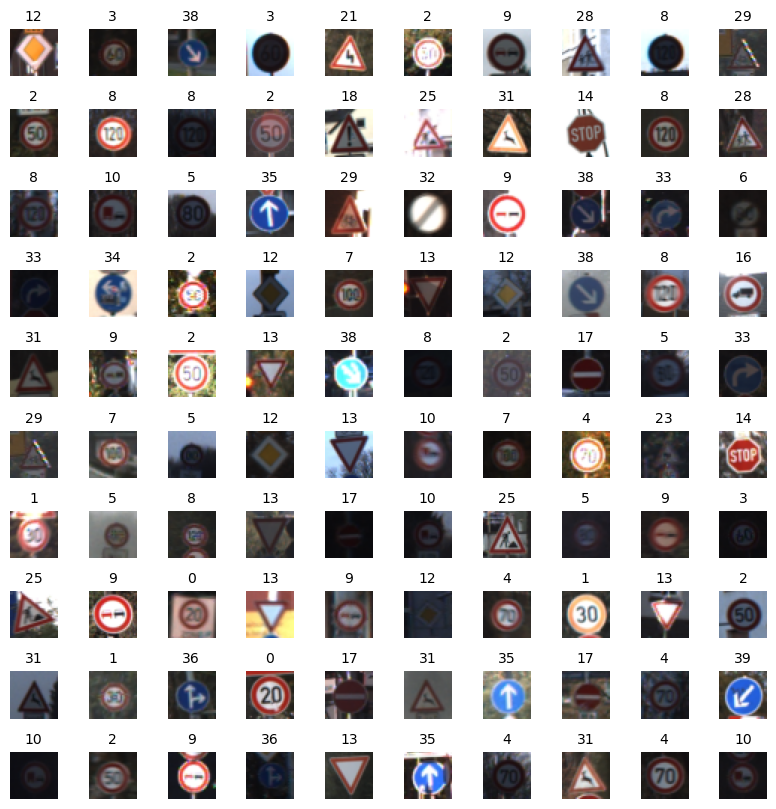

In [5]:
#Create Grid for visualizing images
w_grid = 10
h_grid = w_grid

fig, axes = plt.subplots(h_grid, w_grid, figsize = (10,10))
axes = axes.ravel()
n_training = len(x_train)

for i in np.arange(0, w_grid * h_grid):
    
    index = np.random.randint(0,n_training)

    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index], fontsize = 10)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.7)


# NORMALIZATION AND GRAYSCALING IMAGES

In [6]:
from sklearn.utils import shuffle

#Shuffle to avoid the model learning the order of the images
x_train , y_train = shuffle(x_train, y_train)

In [7]:
#Average of 3 channel color (RGB)
x_train_gray = np.sum(x_train/3, axis = 3, keepdims = True)
x_test_gray = np.sum(x_test/3, axis = 3, keepdims = True)
x_valid_gray = np.sum(x_valid/3, axis = 3, keepdims = True)


In [8]:
#Normalizing the grayscaled x_train
x_train_gray_norm = (x_train_gray - 128)/128
x_test_gray_norm = (x_test_gray - 128)/128
x_valid_gray_norm = (x_valid_gray - 128)/128

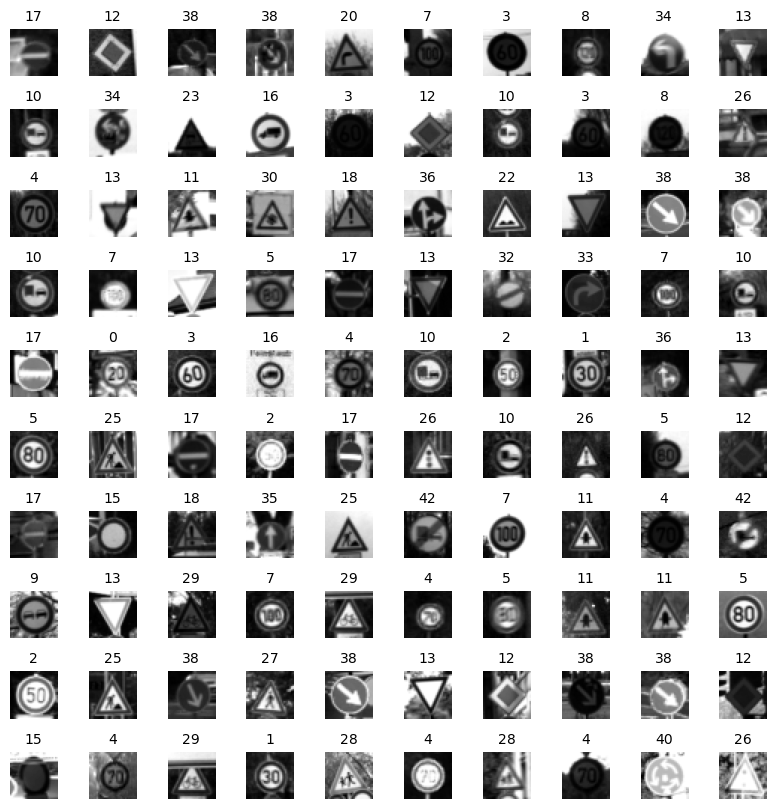

In [9]:
#Create Grid for visualizing images
w_grid = 10
h_grid = w_grid

fig, axes = plt.subplots(h_grid, w_grid, figsize = (10,10))
axes = axes.ravel()

for i in np.arange(0, w_grid * h_grid):
    
    index = random.randint(1, len(x_train_gray))
    axes[i].set_title(y_train[index], fontsize = 10)
    axes[i].imshow(x_train_gray_norm[index].squeeze(), cmap = 'gray')
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.7)


In [45]:
# Model Building : CNN with Tensorflow
from tensorflow.keras import datasets, layers, models

CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5, 5), activation = 'relu', input_shape= (32, 32, 1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5, 5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())


CNN.add(layers.Flatten())
CNN.add(layers.Dense(120 , activation= 'relu'))
CNN.add(layers.Dense(84, activation= 'relu'))
CNN.add(layers.Dense(43, activation= 'softmax'))


CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 6)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 400)              

# Compiling and Training the CNN

In [11]:
#Sparse_categorical_Cross_Entropy loss used for multiple categories 
#Adam Optimizer
CNN.compile(optimizer= 'Adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [12]:
history = CNN.fit(x_train_gray_norm,
                 y_train,
                 batch_size = 500,
                 epochs = 10,
                 verbose = 1,
                 validation_data = (x_valid_gray_norm, y_valid))

Epoch 1/10
70/70 [==============================] - 38s 538ms/step - loss: 3.1937 - accuracy: 0.1748 - val_loss: 2.6714 - val_accuracy: 0.2832
Epoch 2/10
70/70 [==============================] - 38s 543ms/step - loss: 1.7017 - accuracy: 0.5240 - val_loss: 1.3131 - val_accuracy: 0.6390
Epoch 3/10
70/70 [==============================] - 30s 433ms/step - loss: 0.9883 - accuracy: 0.7148 - val_loss: 0.9170 - val_accuracy: 0.7274
Epoch 4/10
70/70 [==============================] - 35s 493ms/step - loss: 0.7504 - accuracy: 0.7863 - val_loss: 0.7566 - val_accuracy: 0.7658
Epoch 5/10
70/70 [==============================] - 31s 432ms/step - loss: 0.6194 - accuracy: 0.8238 - val_loss: 0.6690 - val_accuracy: 0.7939
Epoch 6/10
70/70 [==============================] - 32s 458ms/step - loss: 0.5265 - accuracy: 0.8503 - val_loss: 0.6058 - val_accuracy: 0.8181
Epoch 7/10
70/70 [==============================] - 33s 469ms/step - loss: 0.4613 - accuracy: 0.8707 - val_loss: 0.5492 - val_accuracy: 0.8306

# Model Performance

In [15]:
score = CNN.evaluate(x_test_gray_norm, y_test)
print('Test Accuracy {}'.format(score[1]))

395/395 [==============================] - 2s 5ms/step - loss: 0.7209 - accuracy: 0.8511
Test Accuracy 0.8510688543319702


In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

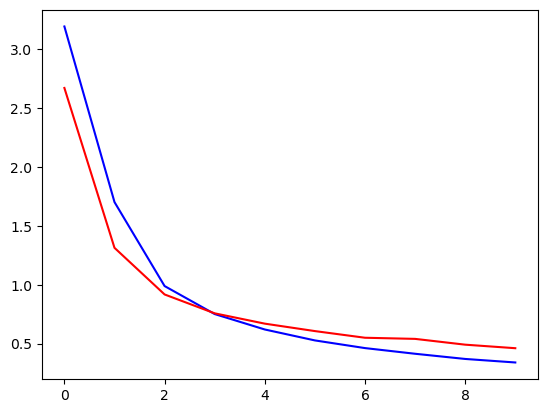

In [23]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Training Loss')
plt.show()

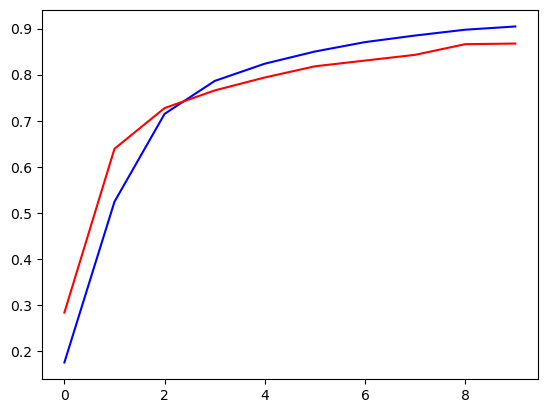

In [24]:
plt.plot(epochs, accuracy, 'b', label='Training Loss')
plt.plot(epochs, val_accuracy, 'r', label='Training Loss')
plt.show()

395/395 [==============================] - 1s 4ms/step


<Axes: >

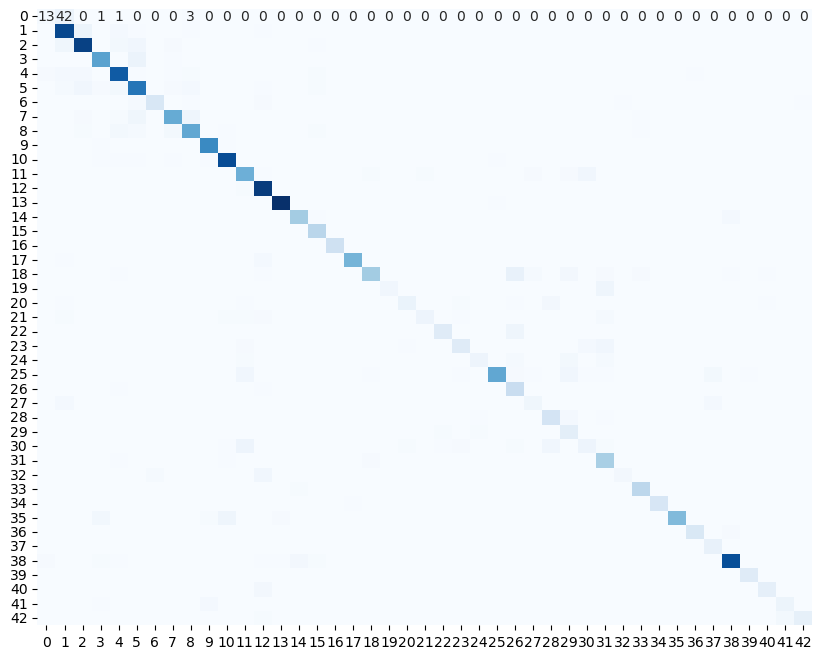

In [44]:
from sklearn.metrics import confusion_matrix

predictions = CNN.predict(x_test_gray_norm)
predicted_classes = np.argmax(predictions, axis=1)
y_true = y_test

cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (10,8))

sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False)


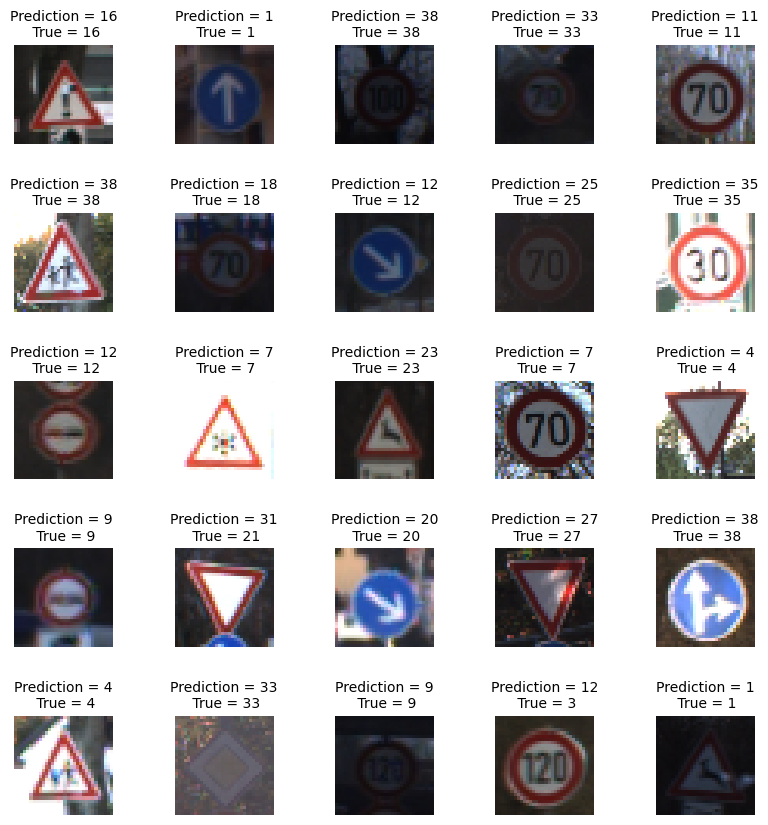

In [51]:
w_grid = 5
h_grid = w_grid

fig, axes = plt.subplots(h_grid, w_grid, figsize = (10,10))
axes = axes.ravel()

for i in np.arange(0, w_grid * h_grid):
    
    index = random.randint(1, len(x_test))
    axes[i].imshow(x_test[index].squeeze(), cmap = 'gray')

    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]), fontsize=10)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.7)